**PROJECT NAME : Hotel Booking Analysis**

In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import ast

## Importing Dataset
Data has been downloaded from keggale 

In [2]:
# Load dataset
hotel_book_df = pd.read_csv('Hotel Bookings.csv')

In [3]:
hotel_book_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Checking Rows and Column of Dataset

In [4]:
hotel_book_df.shape

(119390, 32)

### Dataset Information

In [5]:
hotel_book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Checking Duplicates Values

In [6]:
len(hotel_book_df[hotel_book_df.duplicated()])

31994

In [7]:
# Dropping the duplicate values
hotel_book_df.drop_duplicates(inplace = True)

In [8]:
# After removing our dataset shape changed to this
hotel_book_df.shape

(87396, 32)

In [9]:
hotel_book_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [10]:
# company  and agent column have mostly null values , so we will drop those column
# visualising missing values using heatmap

# plt.figure(figsize(20,10))
# sns.heatmap(hotel_book_df.)

** From above step we observe that
 There are 4 columns country, children, agent and company that have NULL values
 
  In children column we will put 0 assuming no children 
  In country column we will put "other".
  In agent and company we will put zero assuming customer did not book hotels using agent and company

In [11]:
# Now understanding our column
hotel_book_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [12]:
# Dataset Description
hotel_book_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Variable or Column name description

1. *Hotel* : Type of Hotel (Resort or City)
2. *is_cancelled* : value 1 indicates hotel was cancelled and 0 not
3. *lead_time* : no. of days before hotel was booked before arrival
4. *arrival_date_year* : year of arrival date
5. *arrival_date_week_number* : week of arrival
*arrival_date_day_of_month* : month oof arrival
*stays_in_weekend_nights* :  No. of of weekend night (Saturday or Sunday) hotel was booked
*stays_in_week_nights* : No. of of week night (Monday to Friday) hotel was booked
*adults* : No. of adults
*children* : No. of children
*babies* : No. of babies
*distribution_channel* : Booking distrubution channel. The term 'TA' means 'Travel agents' and 'TO' means 'Tour Channel'.
*is_repeated_guest* : Whether the booking done by repeated guest(1) or not(0)
*previous_cancellations* :
*previous_bookings_not_canceled* :
*booking_changes* : No. of changes/amendenment made to the booking from the moment the booking was entered on the PMS until the
moment of check-innor cancellation
*agent* : ID of travel agency that booked hotel
*company* : ID of travel company that booked hotel
*days_in_waiting_list* :Number of the days the booking was in the waiting list before it was was confirmed to the customer
*required_car_parking_spaces* :
*total_of_special_requests* :
*meal* :
*reserved_room_type* :
*assigned_room_type*  :
*deposit_type* :
*adr* : average daily Rate as defined by the sum of all lodging transaction by the total number of staying nights
*customer_type* :
*reservation_status* : Resservation last status, assuming one of the three categories

In [13]:
hotel_book_df.assigned_room_type

0         C
1         C
2         C
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: assigned_room_type, Length: 87396, dtype: object

In [14]:
# checking unique values
pd.Series({col:hotel_book_df[col].unique() for col in hotel_book_df})

# creating a series consisting of every column name of the dataset and its value.
# used for loop to iterate over every column in the dataset

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

## Data Wrangling

In [15]:
hotel_book_df1 = hotel_book_df.copy() 

In [16]:
# Now replacing null values in children column with 0 assuming that no children
# replacing null values in company and agent column with 0 assuming that hotel was booked by custommer by their own

hotel_book_df1['children'].fillna(0,inplace=True)
hotel_book_df1['company'].fillna(0,inplace=True)
hotel_book_df1['agent'].fillna(0,inplace=True)

# In country column we will "other" where we have null values
hotel_book_df1['country'].fillna('others',inplace=True)

In [17]:
hotel_book_df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [18]:
# droping the company column because it contains a lot of null values in comparision to other column

hotel_book_df1.drop(['company'],axis=1,inplace = True)   #dropping the values verically at the axis 1 (columns)

In [19]:
# dropping the row where no adults, children and babies were available because no booking was made that day

no_guest =hotel_book_df1[hotel_book_df1['adults']+hotel_book_df1['babies']+hotel_book_df1['children']==0]
hotel_book_df1.drop(no_guest.index,inplace=True)

In [20]:
# Adding some more column 

# Total guest column to track total people staying
hotel_book_df1['total_guests']=hotel_book_df1['adults']+hotel_book_df1['children']+hotel_book_df1['babies']

# Total number of days stays in hotel including week_nights and weekend_nights

hotel_book_df1['total_stays'] = hotel_book_df1['stays_in_week_nights'] + hotel_book_df1['stays_in_weekend_nights']

In [21]:
# Now final look of our dataset
hotel_book_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0,2


In [22]:
# Checking the shape of final dataset

print(f' final shape of the dataset is {hotel_book_df1.shape}')

 final shape of the dataset is (87230, 33)


In [23]:
# Checkin the unique values in the dataset

pd.Series({col:hotel_book_df1[col].unique() for col in hotel_book_df1})

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 20, 6, 5, 10, 0]
children                                                 [0.0, 1.0, 2.0, 10.0, 3.0]
babies                                                             [0, 1, 2,

**We can see that all the null values has been removed and some new useful column has been added to our dataset

#### What are the manipulation have been done and insight we found ?
 Created a copy of dataset before doing the manipulation and filled the missing values as 0 in children, agent and company column as these column has numeric values and "Others" in country columns. We dropped the country column because it contains a lot of null values.
 
We added *total_stays* and *total_people* columns to our dataset 

##### After manipulating the dataset the insight found are

1. There are two types of hotel i. Resort Hotel ii. City Hotel
2. There are diiferent types guest and they come from diiferent country.
3. Guest can choose different food from menu
4. Guest can book directly or through company or agent.
5. Some guest are repeated.
6. Guest can choose room while booking.
7. There is column available in the dataset named 'adr' which could be used to analyze hotel's performance on the basis of revenue


### 4. Data Vizualization , StoryTelling & Experimenting with charts : Understand the relationships between charts 

#### Which type of Hotel is more preffered by the guests?

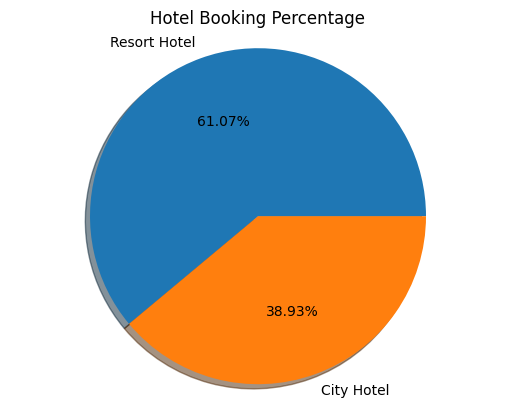

In [24]:
hotel_name = hotel_book_df1['hotel'].unique()

# Checking the number of booking in each type of Hotel

unique_booking = hotel_book_df1.hotel.value_counts()

# Creating a donut chart using matplot
plt.pie(unique_booking,labels = hotel_name,autopct ='%1.2f%%',shadow='True');
plt.title('Hotel Booking Percentage');
plt.axis('equal')
plt.show()
# hotel_name

### Percentage of Cancellation 

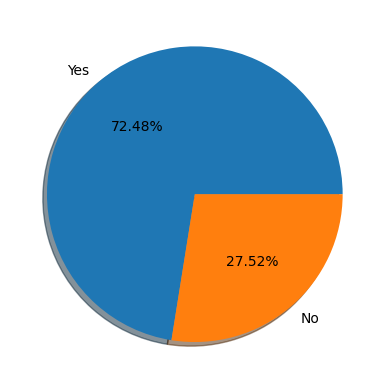

In [25]:
canceled_hotel = hotel_book_df1.is_canceled.value_counts()
mylabel = ['Yes','No']
plt.pie(canceled_hotel,labels=mylabel,autopct ='%1.2f%%',shadow='True');



### Which type of Meal is more preferred by customer?

In [26]:
# Counting each meal type

meal_count = hotel_book_df1.meal.value_counts()

# Name of the meal available in the hotels
meal_name = hotel_book_df1.meal.unique()

# Creating meal dataset 
meal_df = pd.DataFrame(zip(meal_name,meal_count),columns =['meal name','meal count'])
meal_df
# meal_count
# plt.hist(meal_df.meal_count)

,meal name,meal count
0,BB,67907
1,FB,9391
2,HB,9080
3,SC,492
4,Undefined,360


Here

BB - Breakfast and Buu

### Which year has the most booking?

Text(0.5, 1.0, 'Hotel Booking Across the Year')

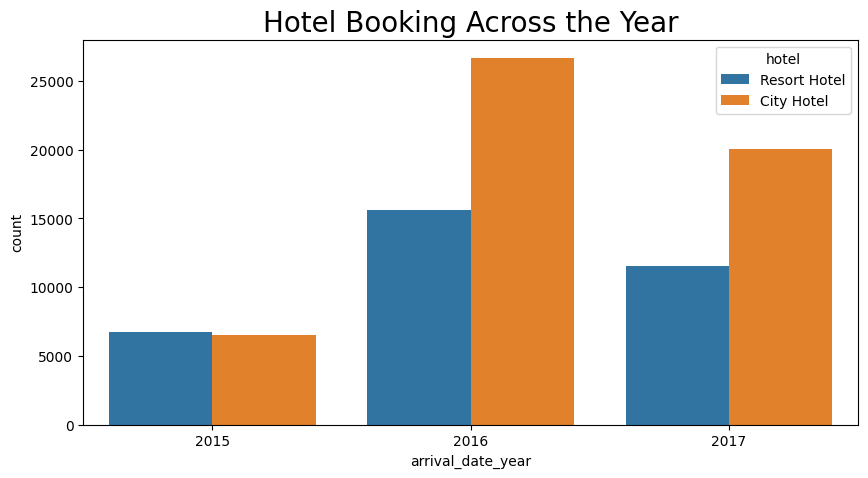

In [27]:
plt.figure(figsize=(10,5))
count = hotel_book_df1.hotel.value_counts()
# count
sns.countplot(x=hotel_book_df1['arrival_date_year'],hue=hotel_book_df1['hotel']);
plt.title('Hotel Booking Across the Year', fontsize = 20)
# plt.show()

#### From the above insights it shows that 
 * In year 2016, booking was the maximum and after that it is declining.
 * The manager can now know what went wrong after 2016 that booking is decreasing. They can analyze and improve them

#### Which month has the maximmum booking?

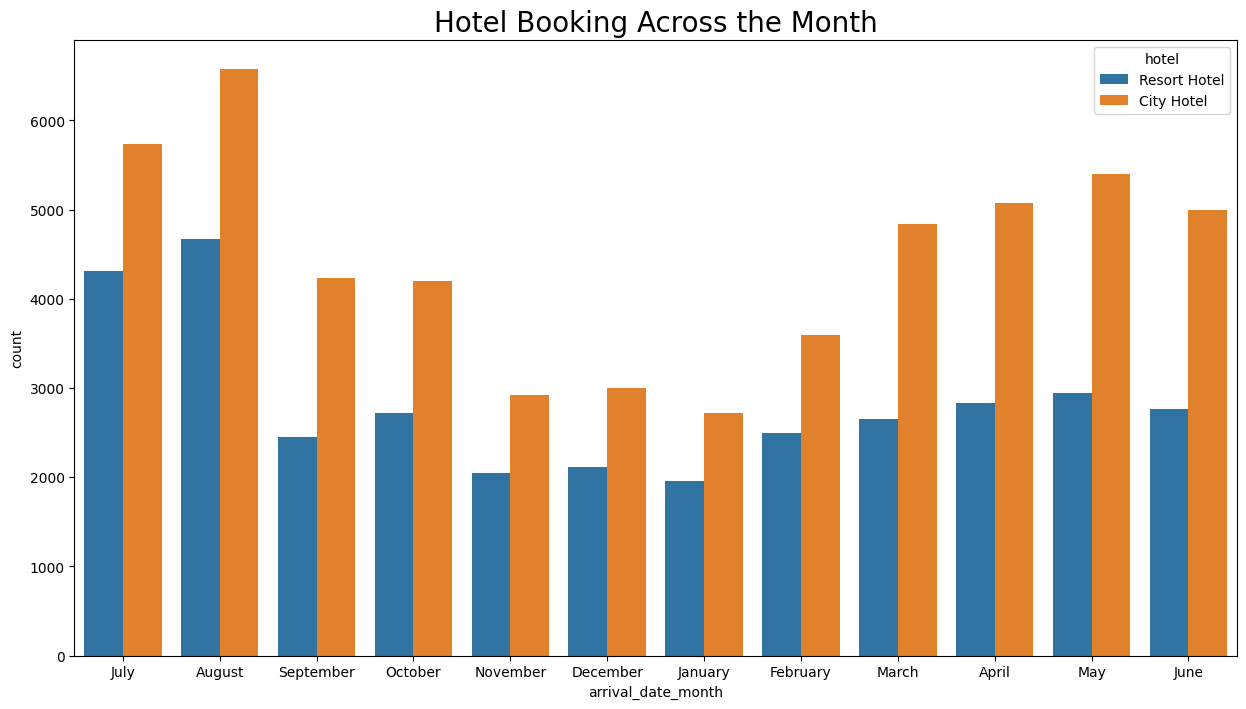

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(x=hotel_book_df1['arrival_date_month'],hue=hotel_book_df1['hotel']);
plt.title('Hotel Booking Across the Month',fontsize=20);


#### Types of Room Preffered by guest

Text(0.5, 1.0, 'Types of Room Preffered by Guest')

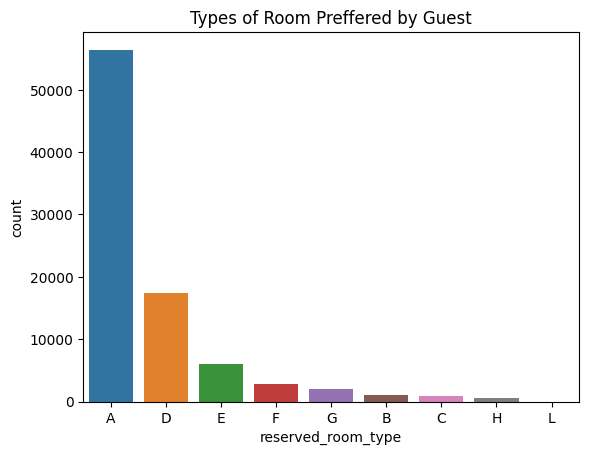

In [29]:
sns.countplot(x=hotel_book_df1['reserved_room_type'],order=hotel_book_df1['reserved_room_type'].value_counts().index);
plt.title('Types of Room Preffered by Guest')

### Types of Room Assigned by Hotel

Text(0.5, 1.0, 'Types of Room Assigned by Hotel')

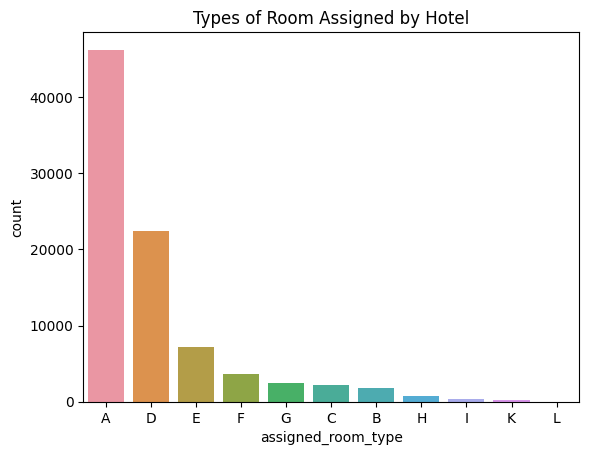

In [30]:
sns.countplot(x=hotel_book_df1['assigned_room_type'],order=hotel_book_df1['assigned_room_type'].value_counts().index);
plt.title('Types of Room Assigned by Hotel')

#### From the above two charts we see that 
 * Type A room is more preffered by guest.
 * More than 55000 guest book Type A room 
 * But less than 50000 guest are alloted Type A room.
 * So Hotel should focus more on Type A room
 
 * Type D room is booked less but was alloted more so hotel should decrease D    type room and increase Type A room 

### Repeated Guest Results

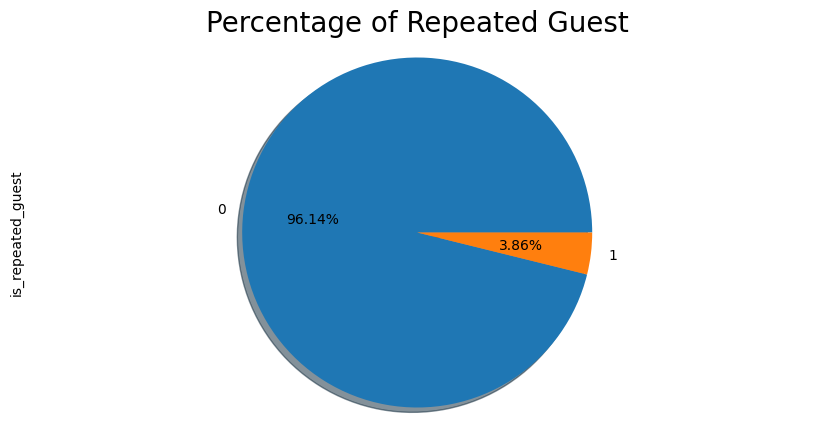

In [31]:
# Creating a variable containing guest with their repeated count
is_repeated = hotel_book_df1.is_repeated_guest.value_counts()

# Plotting pie chart
is_repeated.plot.pie(autopct='%1.2f%%',figsize=(10,5),shadow=True);
plt.title('Percentage of Repeated Guest',fontsize = 20)

plt.axis('equal');

### From the above insight it clear that
 * only 3.86% of guest are repeatedly which is very less percentage
 * Hotel management need to improve their services
 * Hotel can offer discount to repeated guest to increase its number

## Types of Customer Visiting the Hotel

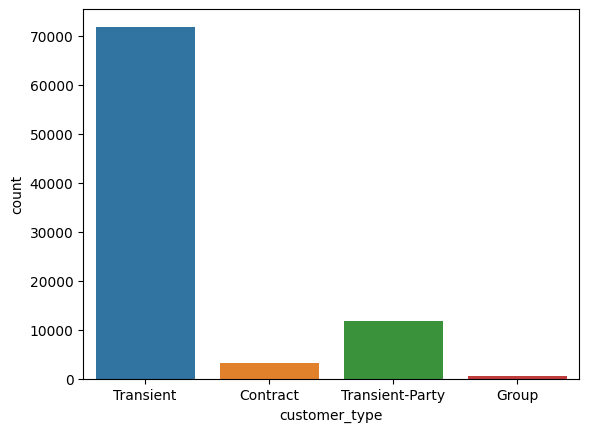

In [32]:
# plotting type of customer visiting hotel using bar graph
sns.countplot(x=hotel_book_df1['customer_type']);


#### From Which market segment more customer are visiting the hotel?

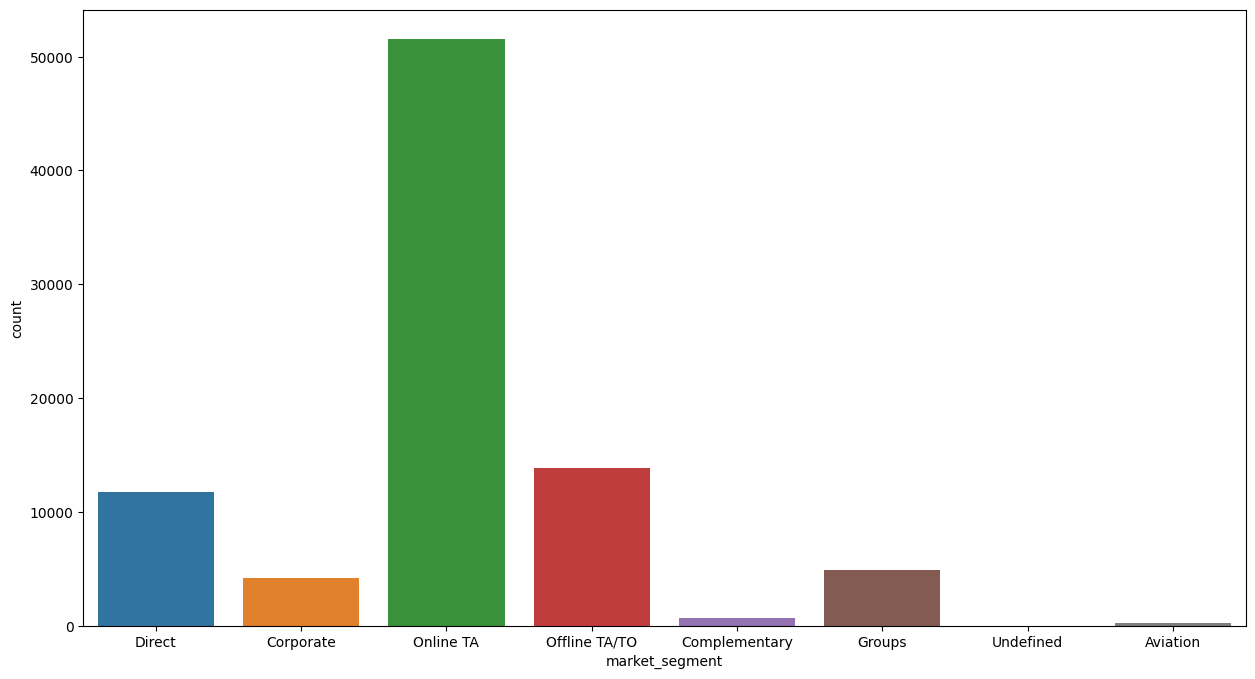

In [33]:
plt.figure(figsize=(15,8));
sns.countplot(x=hotel_book_df1['market_segment']);

 online TA = online Tour agent

### Types of Deposit preffered my Customer

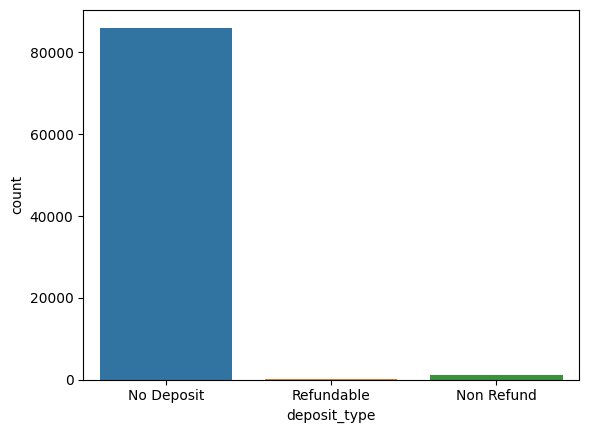

In [34]:
sns.countplot(x=hotel_book_df1['deposit_type']);

* From the above chart we see that Most of the customer don't deposit their money when they book the hotel.

## Bivariate and Multivariate Analysis




How long people stay in the Hotel?

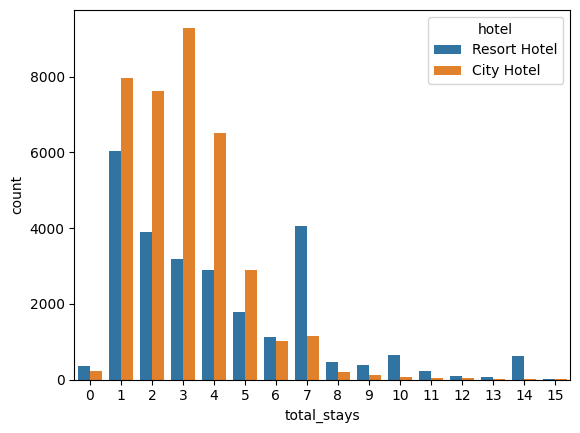

In [35]:
# Creating a not cancelled dataframe 

not_cancelled_df = hotel_book_df1[hotel_book_df1['is_canceled']==0]

# Creating a hotel stay of less than 15
hotel_stay_df = not_cancelled_df[not_cancelled_df['total_stays']<=15]

sns.countplot(x=hotel_stay_df['total_stays'],hue =hotel_stay_df['hotel']);

## Which hotel makes more revenue?

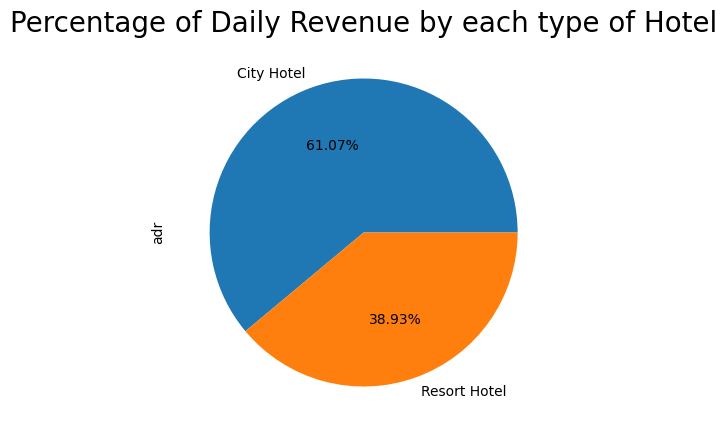

In [36]:
# Counting the revenue for each hotel type using group by function

most_rev = hotel_book_df1.groupby('hotel')['adr'].count()


# plotting the revenue in a pie chart
most_rev.plot.pie(autopct ='%1.2f%%',figsize=(10,5));

# Setting Title
plt.title('Percentage of Daily Revenue by each type of Hotel',fontsize=20);

In [37]:
hotel_book_df1['days_in_waiting_list']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: days_in_waiting_list, Length: 87230, dtype: int64

## Waiting Time in Each Type of Hotel

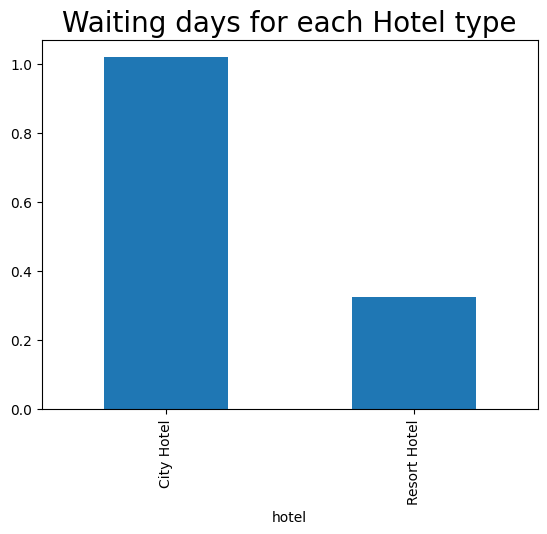

In [38]:
# Finding average waiting time in each type Hotel
waiting_time = hotel_book_df.groupby('hotel')['days_in_waiting_list'].mean()

# Plotting bar graph for hotel
waiting_time.plot.bar(x='hotel_book_df1[hotel]',y='waiting_time');
plt.title('Waiting days for each Hotel type',fontsize=20);

* From the above chart we see that City hotel has more waiting days about 1 days.

* This might be because people stay more is city hotel in comparision to Resort Hotel

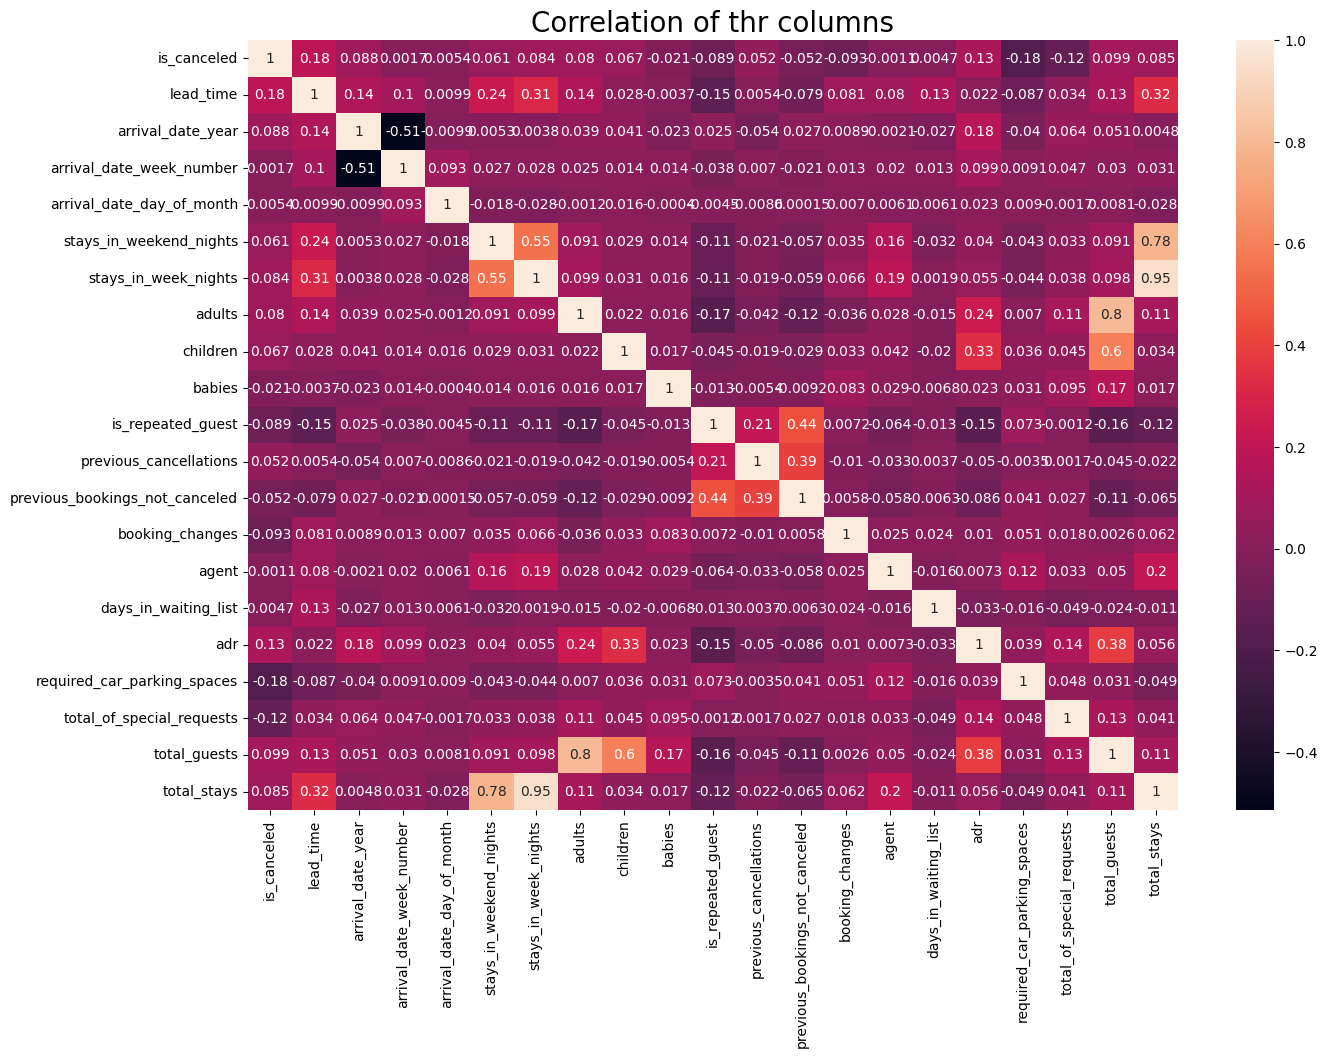

In [39]:
# Correlation Heatmap  visualization Code
# Setting the chart size
plt.figure(figsize=(15,10))

# Creating Heatmap
sns.heatmap(hotel_book_df1.corr(numeric_only=True),annot=True)

# setting the Title
plt.title('Correlation of thr columns',fontsize = 20)

plt.show()

## Solution to Business Objective

1. Resort Hotel are  more preffered so owner should offer discount in city hotel to increase booking
2. Waiting Time in city hotel is high as compared to resort hotel.
3. Optimal stay in both hotel is less than 7 days.  
4. Room A type hotel is most booked by guest.
5. Number of repeated guest is less than 4% so it is obvious that they are not liking hotel so 
   they need to improve their services.
6. City Hotel should increase rooms to decrease waiting period

## Conclusion  

* Inorder to increase the business I would suggest to introduce dynamic programming and offer discount.
* To attract old customer hotel should give loyality discount to customer so that they visit again because very less number of repeated guest.